# 🏗️ Energy Efficiency Prediction Project
## Predicting Heating and Cooling Loads Based on Building Features
**Objective**: Help a construction company estimate how design features affect energy usage to promote greener buildings.
---

### 🔍 1. Problem Understanding
- **Type**: Supervised Regression
- **Targets**: `Heating Load`, `Cooling Load`
- **Features**: Relative Compactness, Surface Area, Wall Area, Roof Area, Overall Height, Orientation, Glazing Area, Glazing Area Distribution

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [60]:
# Load the dataset
df = pd.read_csv('energy_efficiency_data.csv')
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [61]:
# Check info and missing values
print(f"Shape: {df.shape}")
df.info()
df.isnull().sum()

Shape: (768, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [62]:
# Convert to categorical and apply label encoding
from sklearn.preprocessing import LabelEncoder

df['Orientation'] = df['Orientation'].astype('category')
df['Glazing_Area_Distribution'] = df['Glazing_Area_Distribution'].astype('category')

le = LabelEncoder()
df['Orientation'] = le.fit_transform(df['Orientation'])
df['Glazing_Area_Distribution'] = le.fit_transform(df['Glazing_Area_Distribution'])

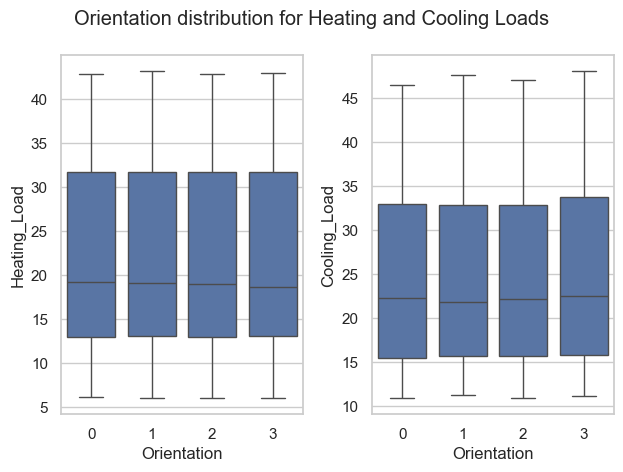

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot(ax=ax1, data=df, x='Orientation', y='Heating_Load')
sns.boxplot(ax=ax2, data=df, x='Orientation', y='Cooling_Load')
plt.suptitle('Orientation distribution for Heating and Cooling Loads')
plt.tight_layout()
plt.show()

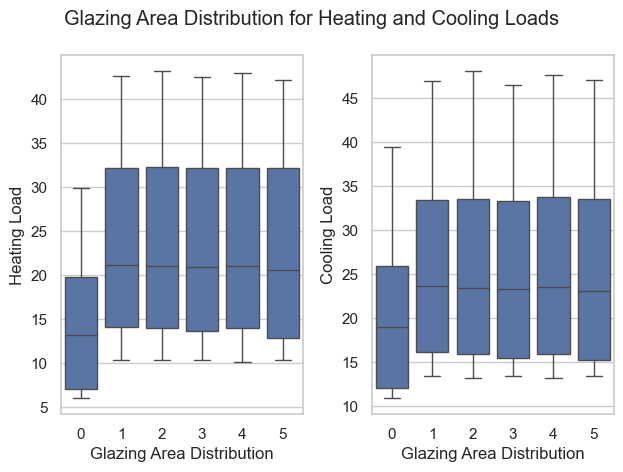

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot(ax=ax1, data=df, x='Glazing Area Distribution', y='Heating Load')
sns.boxplot(ax=ax2, data=df, x='Glazing Area Distribution', y='Cooling Load')
plt.suptitle('Glazing Area Distribution for Heating and Cooling Loads')
plt.tight_layout()
plt.show()

In [65]:
# Feature scaling and train-test split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(['Heating Load', 'Cooling Load'], axis=1)
y = df[['Heating Load', 'Cooling Load']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

KeyError: "['Heating Load', 'Cooling Load'] not found in axis"

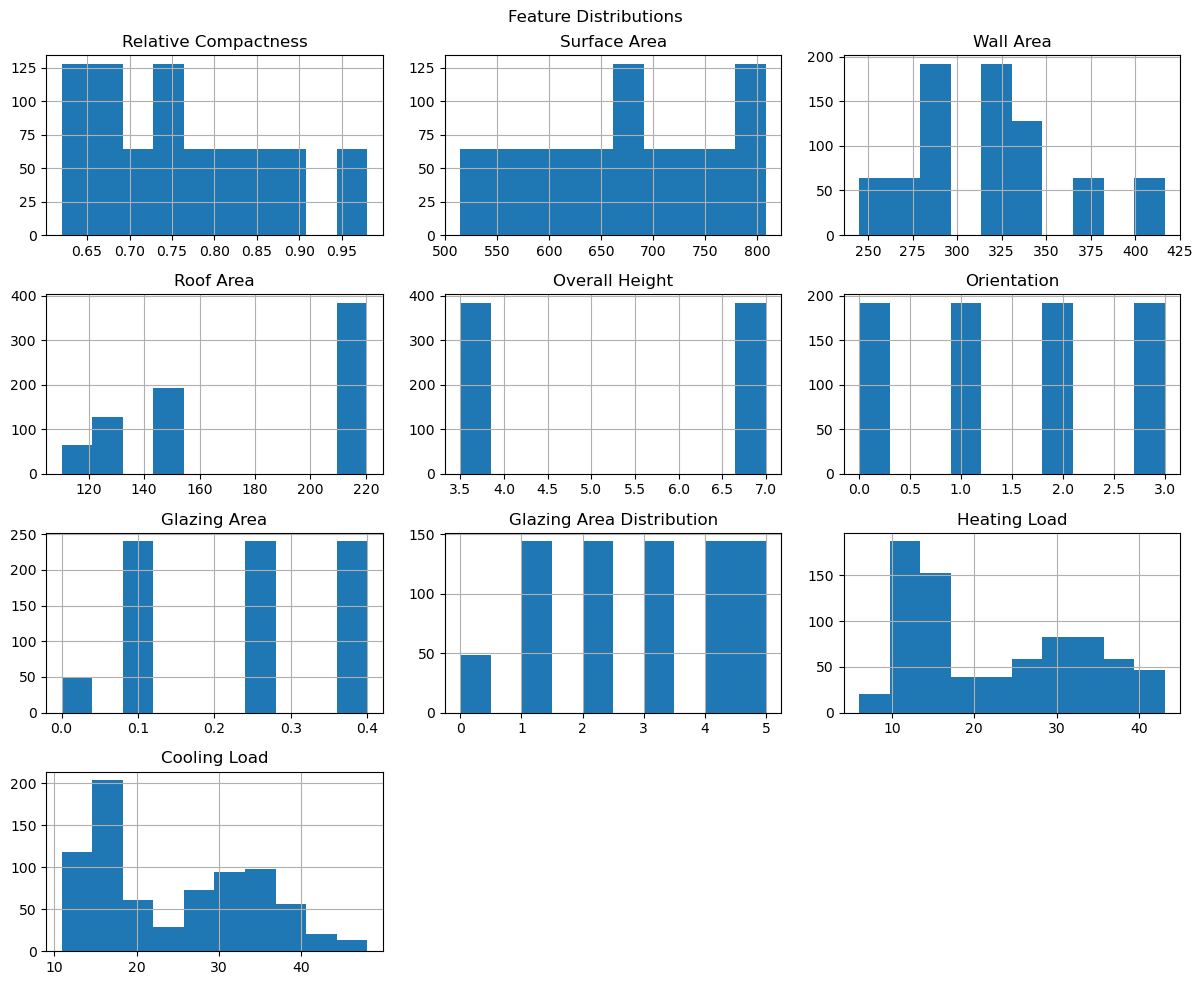

In [ ]:
df.hist(figsize=(12, 10))
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

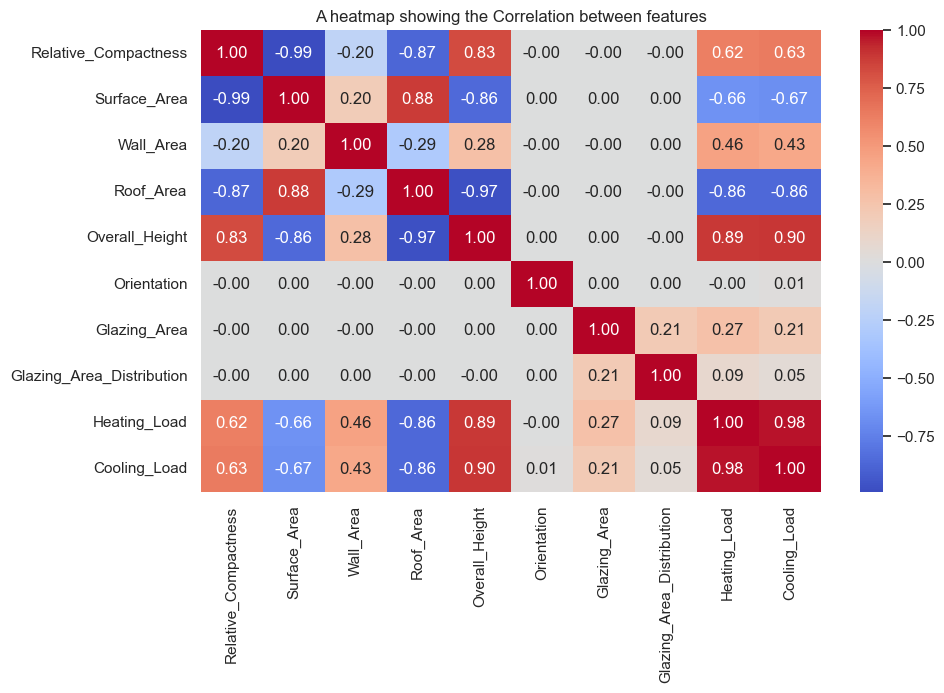

In [ ]:
# Correlation heatmap
corr_matrix= df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap= 'coolwarm', fmt='.2f')
plt.title('A heatmap showing the Correlation between features')
plt.show()

In [ ]:
# Optional interaction term
df['Glazing_Orientation'] = df['Glazing_Area'] * df['Orientation'].astype(int)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": MultiOutputRegressor(XGBRegressor(random_state=42))
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

pd.DataFrame(results).T

,MAE,MSE,R2
Linear Regression,2.188796,9.866762,0.899302
Ridge Regression,2.193372,9.575735,0.902176
Lasso Regression,2.652431,13.091589,0.866156
Random Forest,0.752194,1.942480,0.979186
XGBoost,0.356125,0.451302,0.995229


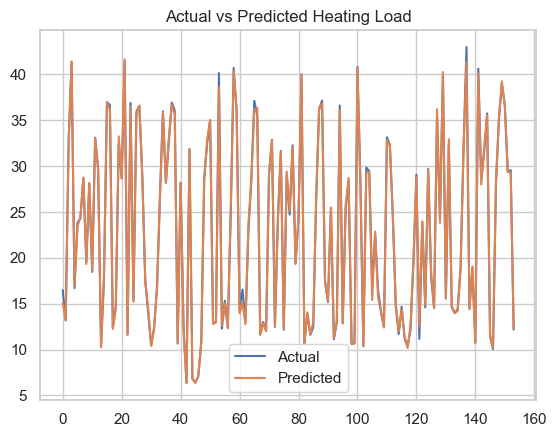

In [ ]:
# Actual vs predicted for Heating Load using XGBoost
model = MultiOutputRegressor(XGBRegressor(random_state=42))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.plot(y_test.values[:, 0], label='Actual')
plt.plot(y_pred[:, 0], label='Predicted')
plt.title('Actual vs Predicted Heating Load')
plt.legend()
plt.show()

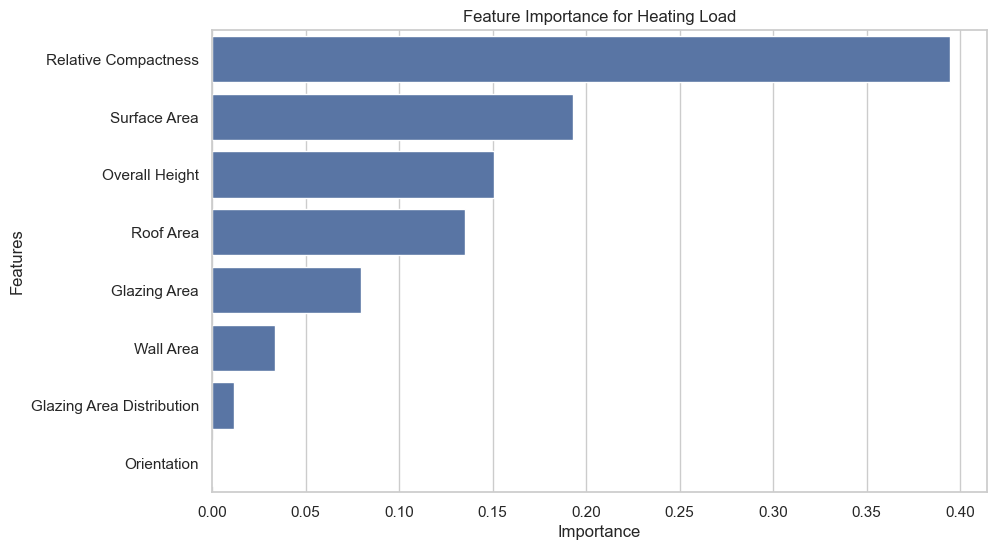

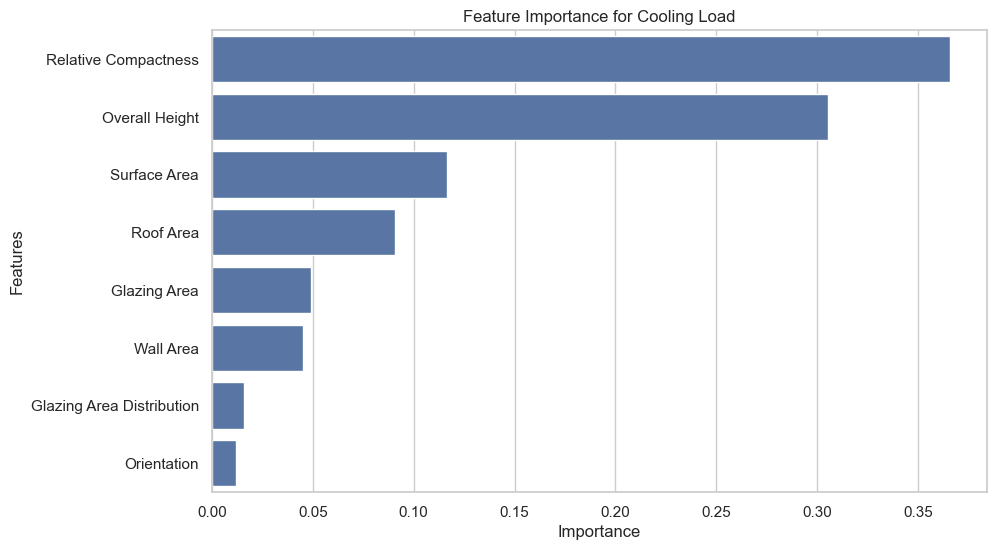

In [ ]:
from sklearn.multioutput import MultiOutputRegressor

# Fit MultiOutputRegressor with RandomForestRegressor
rf_multi = MultiOutputRegressor(RandomForestRegressor(random_state=42))
rf_multi.fit(X_train, y_train)

for i, col in enumerate(y_train.columns):
    importances = rf_multi.estimators_[i].feature_importances_
    features = X.columns
    Importance_df = pd.DataFrame({
        'Features': features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)
    plt.figure(figsize=(10,6))
    sns.barplot(data=Importance_df, y='Features', x='Importance')
    plt.title(f'Feature Importance for {col}')
    plt.show()

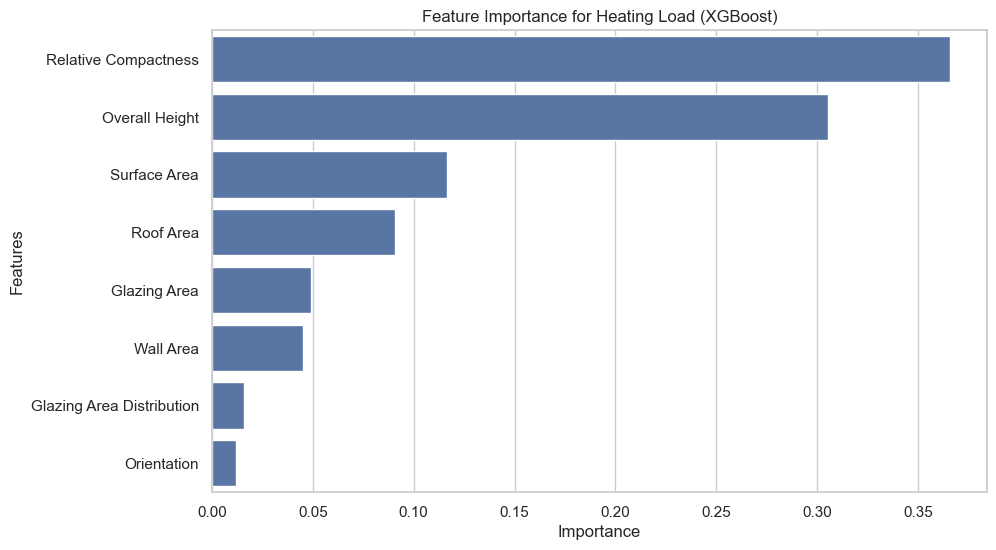

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=Importance_df, y='Features', x='Importance')
plt.title('Feature Importance for Heating Load (XGBoost)')
plt.show()

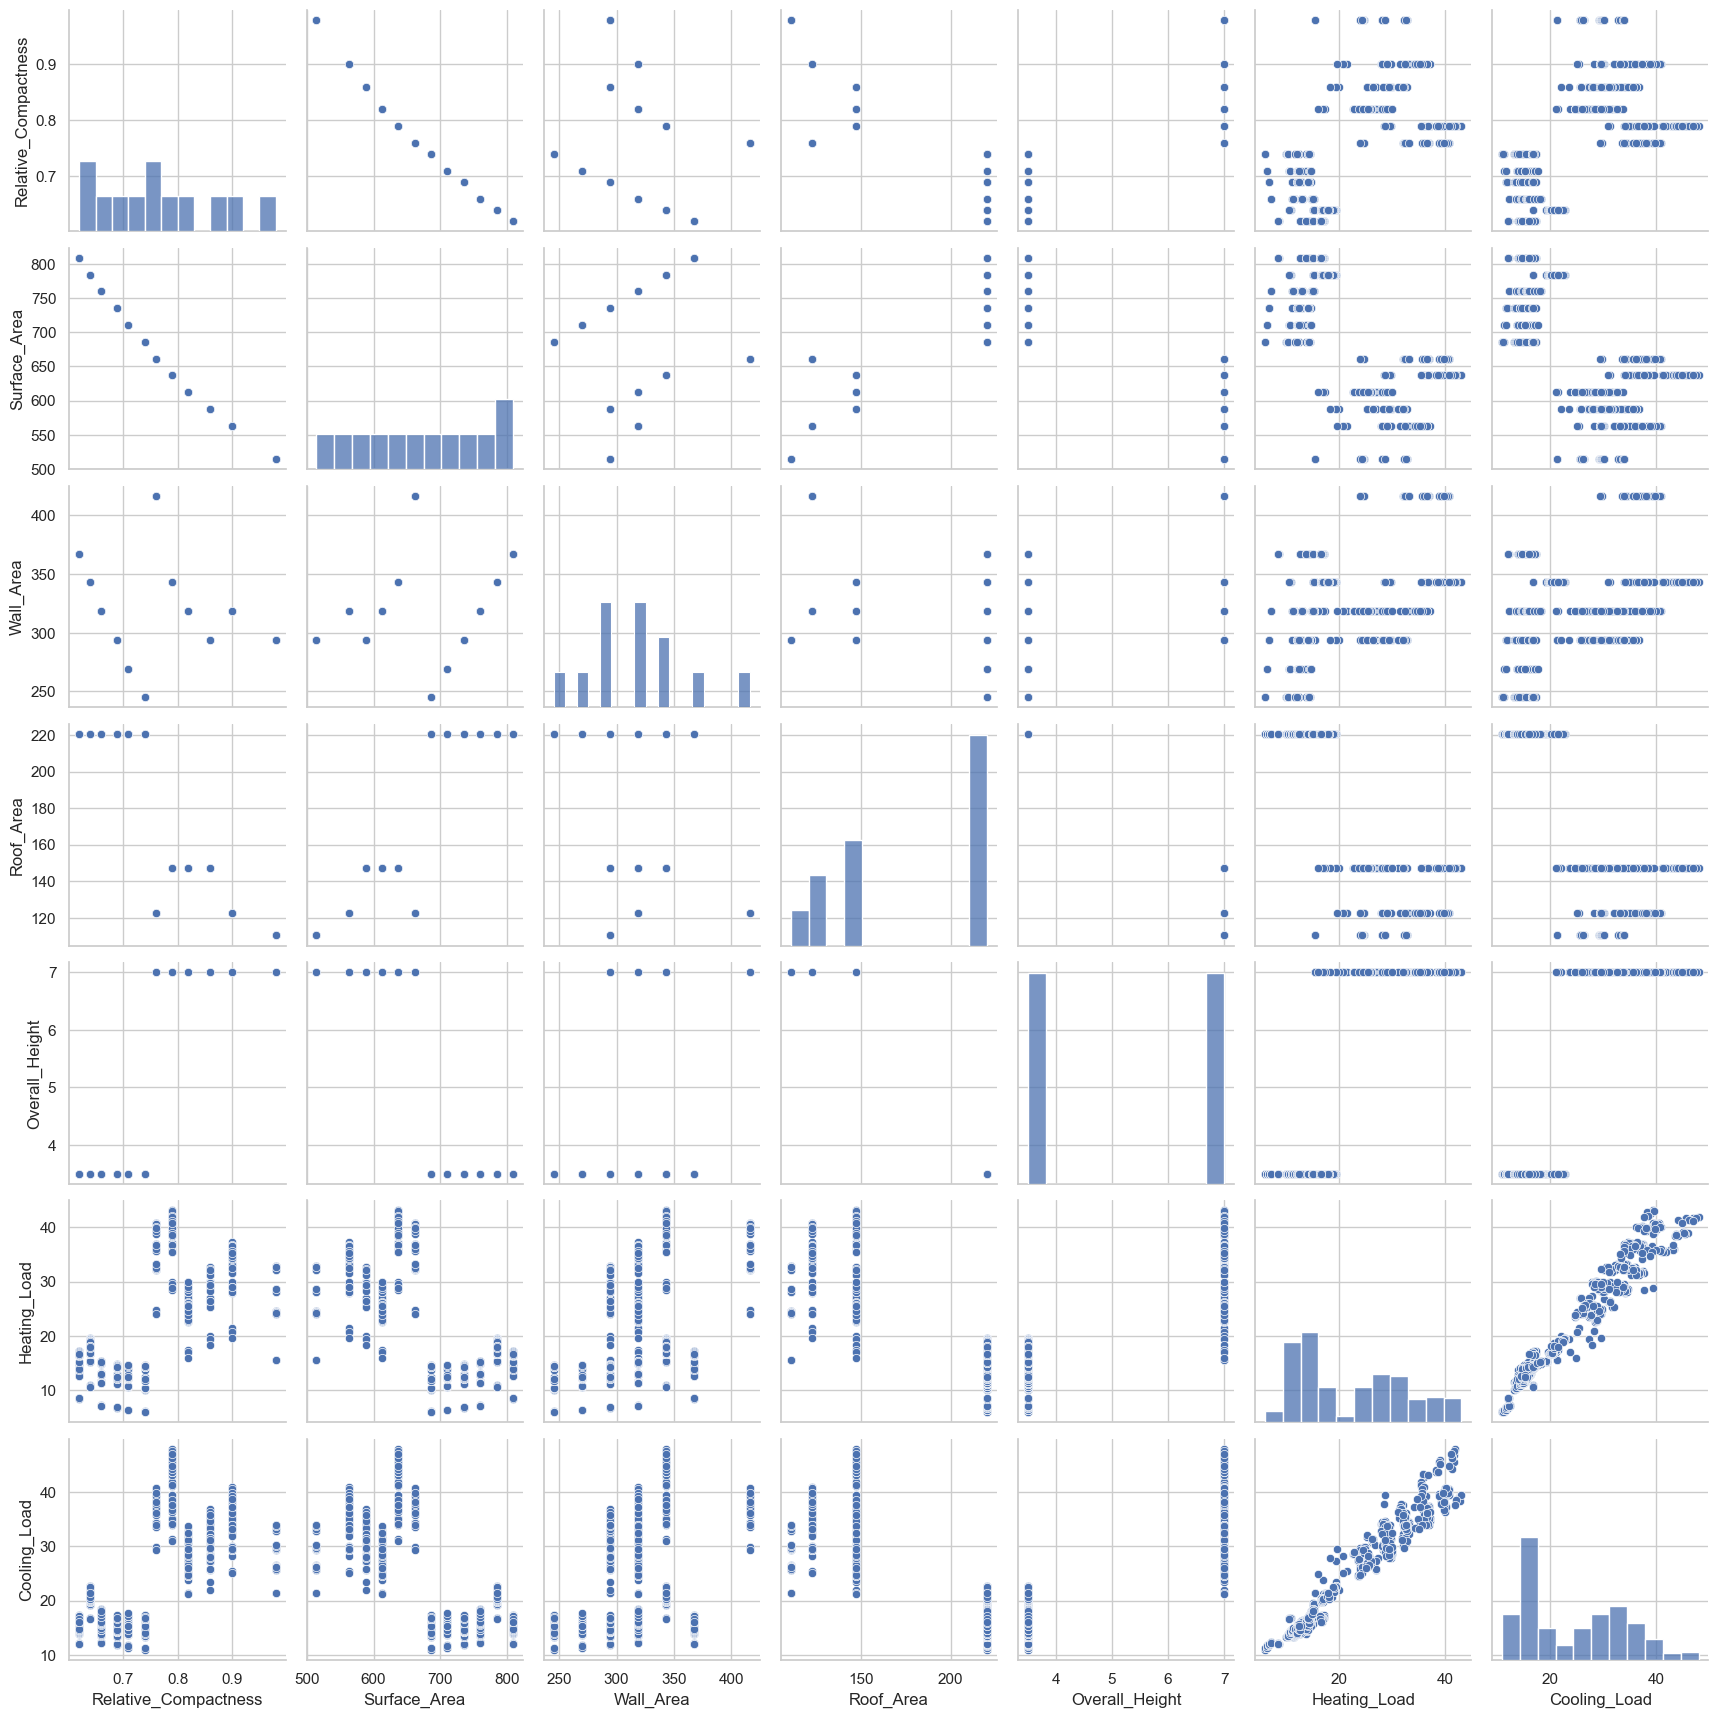

In [ ]:
# Pairplot to explore variable relationships
sns.pairplot(df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 
                 'Roof_Area', 'Overall_Height', 'Heating_Load', 'Cooling_Load']])
plt.show()

In [ ]:
# Statistical summary
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,0.400000,5.00000,43.100000,48.030000


### 📌 Key Takeaways
- Important features influencing heating and cooling loads identified.
- XGBoost and Random Forest showed strong predictive performance.
- Next step: Model deployment or reporting insights to stakeholders.